In [1]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CosinorPy import file_parser,cosinor

Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_measurement)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\CosinorPy\file_parser.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

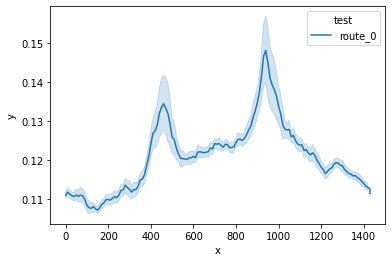

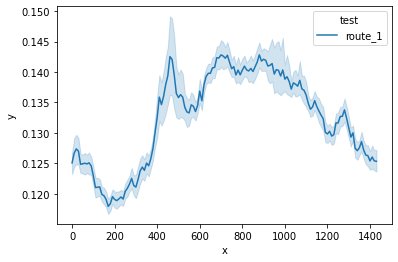

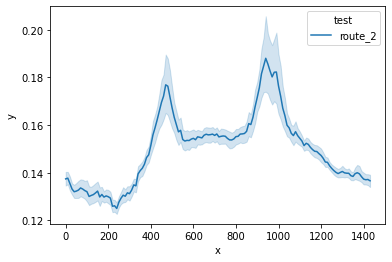

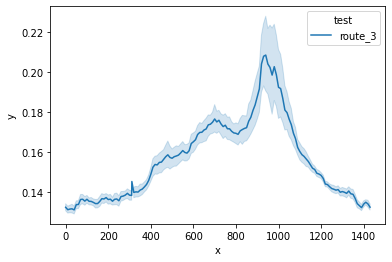

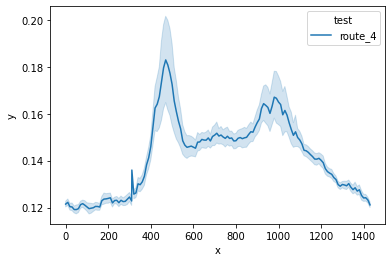

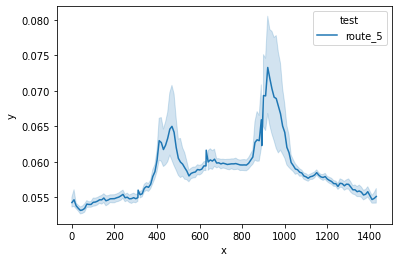

In [2]:
filename= 'google_traffic.xlsx'
df = rda.cosinor_read(filename)
df['x']=df['x']*60
rda.export_csv(df,filename)
filename= 'google_traffic.csv'
rda.plot_data(df)

In [3]:
rda.cosinorpy(filename,sep='\t',n_components=3,period=24*60)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\rda_package\rda.py:216: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'test': test,
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\rda_package\rda.py:216: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'test': test,
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\rda_package\rda.py:216: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'test': test,
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\rda_package\rda.py:216: FutureWarning: The frame.append method is deprecated and will be remo

Cosinor Done :)


,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,route_0,1440.0,3.0,1.110223e-16,1.110223e-16,1.110223e-16,1.332268e-16,0.240622,0.449394,0.448319,10201.397526,0.014834,2.157290,0.121384,"[475.6756756756757, 945.5855855855856]","[0.12659982413908474, 0.13621803436480995]","[170.0900900900901, 671.7117117117117]","[0.10655030922337885, 0.12004730416075267]",0.017345,0.008846
1,route_1,1440.0,3.0,1.110223e-16,1.110223e-16,1.110223e-16,1.332268e-16,0.143614,0.519602,0.518666,11004.835447,0.011413,2.396290,0.130680,[890.8108108108107],[0.14209359514558756],[187.38738738738738],[0.11926721959010764],0.013395,0.006832
2,route_2,1440.0,3.0,1.110223e-16,1.110223e-16,1.110223e-16,1.332268e-16,0.709459,0.462524,0.461476,8538.420873,0.024897,2.094395,0.149819,"[504.5045045045045, 960.0]","[0.1633437244508123, 0.17471534412154602]","[193.15315315315314, 1288.6486486486485]","[0.12492215084766185, 0.13903445928892688]",0.029778,0.015187
3,route_3,1440.0,3.0,1.110223e-16,1.110223e-16,1.987299e-14,1.987299e-14,1.006753,0.516439,0.515496,7995.827519,0.028112,2.182448,0.162223,[939.8198198198198],[0.1903342118513268],"[196.03603603603602, 1352.072072072072]","[0.13411008758809784, 0.13428645966708858]",0.035478,0.018094
4,route_4,1440.0,3.0,1.110223e-16,1.110223e-16,1.110223e-16,1.332268e-16,1.014992,0.412433,0.411287,7986.359081,0.023575,-2.213895,0.139091,"[507.3873873873874, 971.5315315315315]","[0.16120075496544126, 0.16266563649548918]",[170.0900900900901],[0.1155175379180657],0.035617,0.018165
5,route_5,1440.0,3.0,1.110223e-16,1.110223e-16,1.110223e-16,1.332268e-16,0.121582,0.230704,0.229202,11249.189647,0.006237,2.207606,0.059231,"[469.9099099099099, 934.0540540540541]","[0.061181926973518146, 0.06546790721217301]","[164.32432432432432, 663.063063063063, 1268.46...","[0.052994666414870564, 0.05841128420057113, 0....",0.012331,0.006289


In [4]:
print(filename)
rda.meta2d_format(filename=filename,sep='\t')

google_traffic.csv
Index(['gene', 'T0_Rep1', 'T0_Rep2', 'T0_Rep3', 'T0_Rep4', 'T0_Rep5',
       'T0_Rep6', 'T0_Rep7', 'T0_Rep8', 'T0_Rep9',
       ...
       'T1420_Rep22', 'T1420_Rep23', 'T1420_Rep24', 'T1420_Rep25',
       'T1420_Rep26', 'T1420_Rep27', 'T1420_Rep28', 'T1420_Rep29',
       'T1420_Rep30', 'T1420_Rep31'],
      dtype='object', length=4434)
['0_1' '0_2' '0_3' ... '1420_29' '1420_30' '1420_31']


In [5]:
filename=f"Out/{filename[:-4]}/{filename[:-4]}.csv"
rda.meta2d(filename=filename)

google_traffic
The JTK is in process from  18:59:47 05-27-2022 
The analysis by JTK is finished at  19:12:08 05-27-2022 
The LS is in process from  19:12:08 05-27-2022 
The analysis by LS is finished at  19:12:59 05-27-2022 
DONE! The analysis about ' Out/google_traffic/google_traffic.csv '  has been finished.
                user.self     sys.self      elapsed   user.child    sys.child 
"Time used:"     "470.19"     "261.03"     "793.75"           NA           NA 


Meta2d Done :)


In [6]:
rda.pv_dist(filename)
rda.venn(filename)

no Rainout of this file
JTK_pvalue : ok
LS_pvalue : ok
meta2d_pvalue : ok
Cosinor_pvalue : ok
pValue Done :)
no Rainout of this file
no venn
no venn
no venn
no venn
venn Done :)


,CycID,JTK_pvalue,LS_pvalue,meta2d_pvalue,Cosinor_pvalue
0,route_0,0,0,0,1.110223e-16
1,route_1,0,0,0,1.110223e-16
2,route_2,0,0,0,1.110223e-16
3,route_3,0,0,0,1.110223e-16
4,route_4,0,0,0,1.110223e-16
5,route_5,0,0,0,1.110223e-16


<Figure size 432x288 with 0 Axes>